# Using the Bashforth-Adams Algorithm to Improve Discretization

Marcus Rose

The following is a report on the differences between three different algorithms in imporving upon Euler's Method. The three are as follows

- Bashforth-Adams
- Adaptive stepsize
- Runge-Kutta

First, import all necessary packages and frameworks and set up parameters to be used for calculation.

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from itertools import permutations

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

pd.set_option('display.float_format', lambda x: "{:,.2f}".format(x))

# Bashforth-Adams

The Bashforth-Adams algo follows the following discretization to improve upon Euler's method (hence reducing Error):

$$ y_{n+1} = y_n + \frac{3}{2} \delta t f(t_{n}, y_n) - \frac{1}{2}\delta t f(t_{n-1}, y_{n-1}).$$

Below is class for the discretization, followed by graphs and outputs for analyzing the algorithms:

In [42]:
#    Discretization class
#    purpose: 
#
#
class Discretization:
    
    #    constructor
    #    purpose: initialize any instance variables
    #    paramters: 
    #    return: none
    #
    def __init__(self, g=10, y0=500, t0=0, v0=0, dt=0.1, tf=10, t=np.linspace(0,1,1), v=np.zeros([1]),
                 y = np.zeros([1]), nsteps=0): 
        self.g=g
        self.y0=y0
        self.t0=t0
        self.v0=v0
        self.dt=dt
        self.tf=tf
        self.v=v[nsteps]
        self.y=y[nsteps]
        self.t=t
        self.nsteps=int(tf/dt)+1
             
    #    bashforth adams
    #    purpose: exectues the Bashforth-Adams algo using the two first order ODE's as given
    #    paramters: self
    #    return: DataFrame
    #
    def run_bashforth_adams(self):
        # fill the arrays: one to store velocity and the other for distance and establish size
        self.t=np.linspace(self.t0,self.tf,self.nsteps)
        self.v=np.zeros([self.nsteps])
        self.y=np.zeros([self.nsteps])
        
        v_data=np.array([])
        y_data=np.array([])
        
        # iterate and implement the algo
        for i in range(1, self.nsteps):
            self.v[i]=self.v[i-1] + 3/2 * (self.dt) * (-self.g) - 1/2 *(self.dt) * (-self.g) # first ODE
            v_data = np.append(self.v, self.v[i])
    
        for i in range(1, self.nsteps):
            self.y[i]=self.y[i-1] + 3/2 * (self.dt) * (self.v[i]) - 1/2 *(self.dt) * (self.v[i-1]) # second ODE
            y_data=np.append(self.y, self.y[i])

        df=pd.DataFrame([v_data, y_data]).transpose()
        df.columns=['v_i', 'y_i']
        return df
    
    
    #    plotting
    #    purpose: plots given data using matplotlib
    #    paramters: array of data (np.array), x_units (string), y_units (string), title_appendage (string)
    #    return: none
    #
    def plotting(self, arr, x_units, y_units, title_appendage):
        # TODO: fix the legend
        plt.plot(arr)
        plt.title(f'Trajectory of ball without drag ({title_appendage})')
        plt.xlabel(x_units)
        plt.ylabel(y_units)
#         plt.legend(label=list(arr.columns.values.tolist())[0])
        plt.show()
    
    #    bashforth adams analytical solution
    #    purpose: uses analytical solution in solving bashforth adams
    #    paramters: self
    #    return: DataFrame
    #
    def bashforth_adams_analytical(self):
        self.y[0]=self.y0
        
        data=np.array([])
        # apply the iterations by solving the analytical solution
        for i in range(1, self.nsteps):
            self.y[i] = self.y[0]+ self.v0*(self.t[i])-(1/2)*self.g*(self.t[i]**2)
            data = np.append(self.y, self.y[i])
            
        data = pd.DataFrame([data]).transpose()
        data.columns = ['y_i']
        return data
    
    #    error
    #    purpose: solves for error from analytical solution 
    #    paramters: self
    #    return: DataFrame
    #
    def error(self):
        self.y[0]=self.y0
        
        data=np.array([])
        # apply the iterations by solving the analytical solution
        for i in range(1, self.nsteps):
            self.y[i] = self.y[0]+ self.v0*(self.t[i])-(1/2)*self.g*(self.t[i]**2)
            data = np.append(self.y, self.y[i])
        
        error = np.zeros([self.nsteps])
        error = self.y # FIX
        data = pd.DataFrame([error]).transpose()
        return data
    
    #    percent error
    #    purpose: solves for percent error 
    #    paramters: self
    #    return: DataFrame
    #
    def pct_error(self):
        return
#         prc_err = np.zeros([nsteps])
#         prc_err = abs((y-new_y)/(new_y))
        
#         plt.plot(t,prc_err)
#         plt.title('Percent Error between algorithm and analytical solution')
#         plt.xlabel('Time /s')
#         plt.ylabel('percent error')
#         plt.show()

In [43]:
d = Discretization()
d.run_bashforth_adams()

,v_i,y_i
0,0.00,0.00
1,-1.00,-0.15
2,-2.00,-0.40
3,-3.00,-0.75
4,-4.00,-1.20
...,...,...
97,-97.00,-480.15
98,-98.00,-490.00
99,-99.00,-499.95
100,-100.00,-510.00


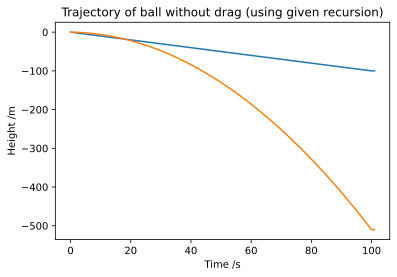

In [4]:
# plotting the data
d.plotting(d.run_bashforth_adams(), 'Time /s', 'Height /m', 'using given recursion')

### Understanding the Analytical Solution

$$ v = -gt+c $$

When $v(0) = 0$, $c = 0 = v(0)$ and

$$ y = -\frac{1}{2}gt^2 + ct + p  $$

Let $y(0) = 500$ (a rough approx),

$$ \implies y = -\frac{1}{2}gt^2 + tv(0) + y(0)$$ 

In [5]:
# data from analytical
d.bashforth_adams_analytical()

,y_i
0,500.00
1,499.95
2,499.80
3,499.55
4,499.20
...,...
97,29.55
98,19.80
99,9.95
100,0.00


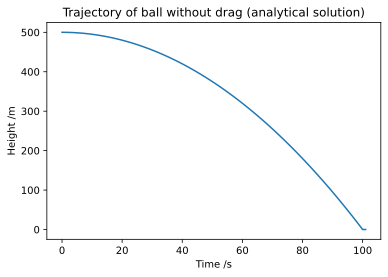

In [6]:
# analytical graphed
d.plotting(d.bashforth_adams_analytical(), 'Time /s', 'Height /m', 'analytical solution')

### Error and Perecent Error

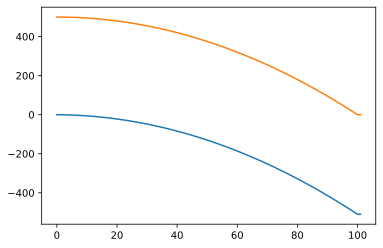

In [7]:
# different y values plotted
y_bashforth_adams_gen = d.run_bashforth_adams().iloc[:, 1:]
y_bashforth_adams_ana = d.bashforth_adams_analytical()

plt.plot(y_bashforth_adams_gen)
plt.plot(y_bashforth_adams_ana)

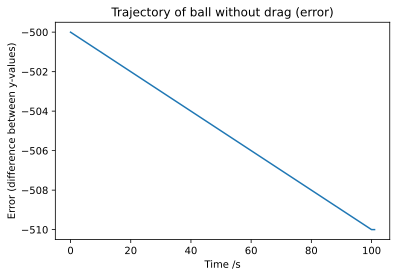

In [8]:
# error plotted
d.plotting(y_bashforth_adams_gen - y_bashforth_adams_ana, 'Time /s', 'Error (difference between y-values)', 'error')

# Applying Bashforth-Adams to Collected Data

No handles with labels found to put in legend.


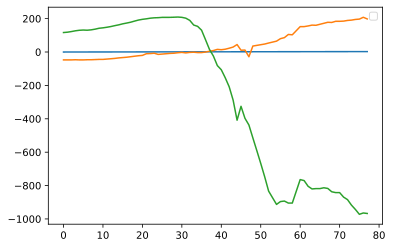

In [45]:
data = pd.read_csv('Tracker Data.csv', delimiter="\t", header=1)
data = data.dropna()
plt.plot(data)
plt.legend()
plt.show()